# Linear Trends of ANHA4-EHX005 Variables

# Content
1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Linear trend of dissolved Barium**](#Linear-trend-of-dissolved-Barium)
 2. [Preparing "dtrend" data for EOF](#Preparing-"dtrend"-data-for-EOF)
1. [**Linear trend of freshwater content (d>65m)**](#Linear-trend-of-freshwater-content,-d>65m)
1. [**Linear trend of concentration/dilution flux (emps)**](#Linear-trend-of-concentration/dilution-flux,-emps)

# Import modules & tools

In [60]:
import sys
sys.path.insert(0, '../../_libs/')
import NEMO_tools as Nts
import Atmos_tools as Ats

In [2]:
import glob
import datetime
import scipy.io
import scipy.signal
import numpy as np
import netCDF4 as nc
import cartopy.feature
import matplotlib.pyplot as plt
from NEMO_tools import reporj_NEMOgrid
from mpl_toolkits.basemap import Basemap, cm
% matplotlib inline

In [4]:
from dateutil.relativedelta import relativedelta
base = datetime.datetime(2002, 1, 1)
date_list = [base + relativedelta(months=x) for x in range(144)]

In [5]:
coordinate_name=glob.glob('../../_data/Exchange/mesh_zgr.nc')
coordinate_obj=nc.Dataset(coordinate_name[0])
nav_lon=coordinate_obj.variables['nav_lon'][:]
nav_lat=coordinate_obj.variables['nav_lat'][:]

# Linear trend of dissolved Barium

In [6]:
FName = '/ocean/yingkai/GEOTRACES/Simulations/BASE01_1m_20020101_20131231_ptrc_T.nc'
ptrc_obj = nc.Dataset(FName)
Ba = ptrc_obj.variables['Ba'][:, :20, :, :]
Ba[Ba==0]=np.nan
Ba = np.nanmean(Ba, 1)

/home/yingkai/anaconda/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [7]:
Ba_np_0 = Ba[:, 350:, :]
Ba_np_0[np.isnan(Ba_np_0)] = 0.0

In [9]:
Ba_mean = np.nanmean(Ba[:, 350:, :], 0)
Ba_res = Ba_np_0 - Ba_mean
Ba_res[np.isnan(Ba_res)]=0.0

In [10]:
fake_x = np.arange(144)

In [11]:
ztrend = np.zeros([450, 544])
offset = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        ztrend[i, j], offset[i, j] = np.polyfit(fake_x, Ba_res[:, i, j], 1)

In [15]:
lev_ztrend = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])/50.0

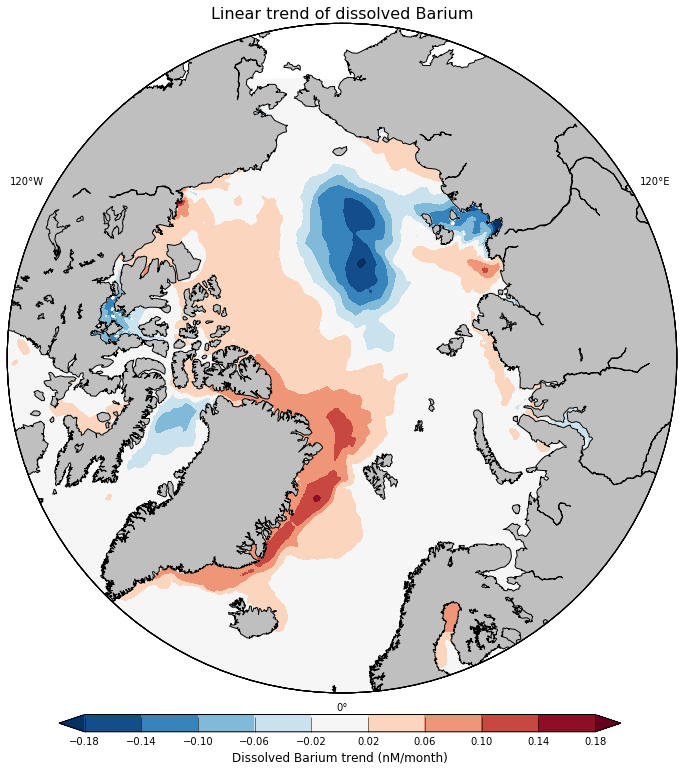

In [61]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='0.75', lake_color=None)
proj.drawcoastlines(linewidth=1, color='k')
x, y = proj(nav_lon[350:, :], nav_lat[350:, :])
CS = proj.contourf(x, y, ztrend, lev_ztrend, cmap = plt.cm.RdBu_r, extend = 'both')

ax.set_title('Linear trend of dissolved Barium', fontsize=16)

cax  = fig.add_axes([0.185, 0.08, 0.65, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('Dissolved Barium trend (nM/month)', fontsize=12)
CBar.ax.tick_params(axis='x', length=15, direction='in')
CBar.set_ticks(lev_ztrend)

## Preparing "dtrend" data for EOF

The idea of "dtrend": Var = mean + trend + varibility, detrend(Var) = mean + varibity = Var - trend

In [18]:
Ba_dtrend = np.zeros(Ba_np_0.shape)
for i in range(144):
    Ba_dtrend[i, :, :] = Ba_mean + Ba_res[i, :, :] - (fake_x[i]*ztrend + offset)

In [19]:
#save_var = {'dtrend_Ba':Ba_dtrend}
#scipy.io.savemat('../../_data/Exchange/dtrend_Ba.mat', mdict=save_var)

# Linear trend of freshwater content, d>65m

In [20]:
FWC_name = sorted(glob.glob('../../_data/MAT files/FWC/FWC_ANHA4_*.mat'))
FWC = np.zeros([144, 800, 544])

for i in range(144):
    MAT = scipy.io.loadmat(FWC_name[i])
    FWC[i, :, :] = MAT['FWC'][:]

In [21]:
FWC = FWC[:, 350:, :]
FWC[np.isnan(FWC)]=0.0

In [22]:
ztrend_FWC = np.zeros([450, 544])
offset_FWC = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        ztrend_FWC[i, j], offset_FWC[i, j] = np.polyfit(fake_x, FWC[:, i, j], 1)

In [23]:
lev_ztrend_FWC = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])/200.0

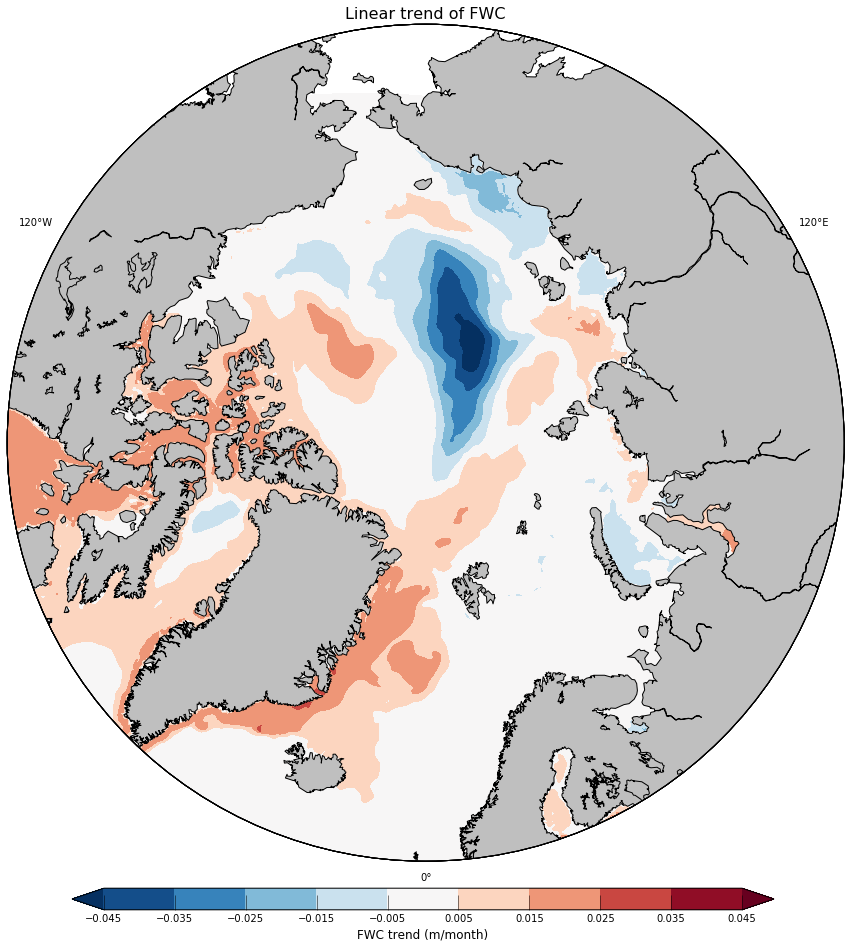

In [62]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='0.75', lake_color=None)
proj.drawcoastlines(linewidth=1, color='k')
x, y = proj(nav_lon[350:, :], nav_lat[350:, :])
CS = proj.contourf(x, y, ztrend_FWC, lev_ztrend_FWC, cmap = plt.cm.RdBu_r, extend='both')

ax.set_title('Linear trend of FWC', fontsize=16)

cax  = fig.add_axes([0.185, 0.08, 0.65, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('FWC trend (m/month)', fontsize=12)
CBar.ax.tick_params(axis='x', length=15, direction='in')
CBar.set_ticks(lev_ztrend_FWC)

# Linear trend of concentration/dilution flux, emps

** Here use "-emps", which has positive for dilution and negative for concentration. **

In [45]:
safl_name = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/iocesafl_monmean.nc'
sss_name  = '/ocean/yingkai/GEOTRACES/FORCING/ANHA4/isssalin_monmean.nc'
safl_obj = nc.Dataset(safl_name)
safl = safl_obj.variables['iocesafl'][:]
sss_obj = nc.Dataset(sss_name)
sss = sss_obj.variables['isssalin'][:]
emps=-1.0*safl*34.7/(3600.0*24*(sss+1.0e-16))

In [46]:
emps = -emps[:, 350:, :]
emps[np.isnan(emps)]=0

In [47]:
ztrend_emps = np.zeros([450, 544])
for i in range(450):
    for j in range(544):
        ztrend_emps[i, j], _ = np.polyfit(fake_x, emps[:, i, j], 1)

In [48]:
lev_ztrend_emps = np.array([-9, -7, -5, -3, -1, 1, 3, 5, 7, 9])

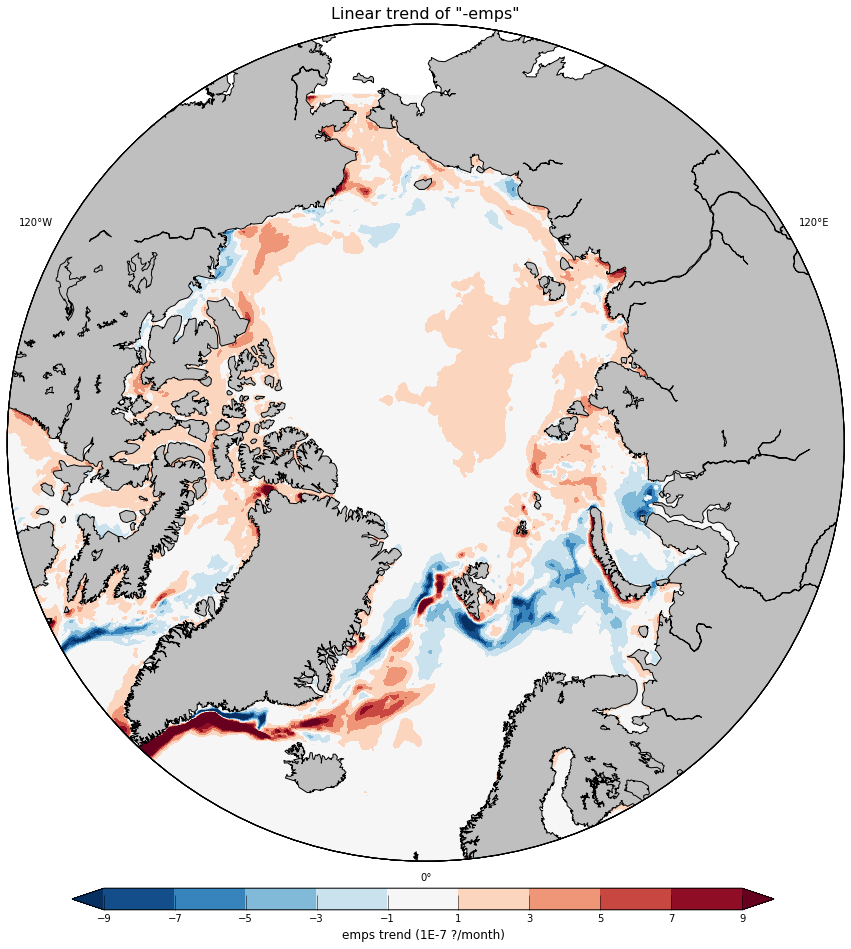

In [63]:
fig = plt.figure(figsize=(15, 15))
ax = fig.gca()
proj=Basemap(projection='npstere', resolution='l', boundinglat=60, lon_0=0, round=True, ax=ax)
proj.drawmeridians(np.arange(0, 360, 120), labels=[1, 1, 1, 1], fontsize=10, latmax=90,linewidth=0)
proj.fillcontinents(color='0.75', lake_color=None)
proj.drawcoastlines(linewidth=1, color='k')
x, y = proj(nav_lon[350:, :], nav_lat[350:, :])
CS = proj.contourf(x, y, ztrend_emps*1e7, lev_ztrend_emps, cmap=plt.cm.RdBu_r, extend='both')

ax.set_title('Linear trend of "-emps"', fontsize=16)

cax  = fig.add_axes([0.185, 0.08, 0.65, 0.02])
CBar = fig.colorbar(CS, cax=cax, orientation='horizontal')
CBar.set_label('emps trend (1E-7 ?/month)', fontsize=12)
CBar.ax.tick_params(axis='x', length=15, direction='in')
CBar.set_ticks(lev_ztrend_emps)